In [4]:
import pandas as pd

df = pd.read_csv("G:\\SHRUTI\\STUDIES\\Data Science\\Network traffic dataset\\cs448b_ipasn.csv")

In [6]:
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

         date  l_ipn  r_asn  f
0  2006-07-01      0    701  1
1  2006-07-01      0    714  1
2  2006-07-01      0   1239  1
3  2006-07-01      0   1680  1
4  2006-07-01      0   2514  1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20803 entries, 0 to 20802
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    20803 non-null  object
 1   l_ipn   20803 non-null  int64 
 2   r_asn   20803 non-null  int64 
 3   f       20803 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 650.2+ KB
None
              l_ipn         r_asn              f
count  20803.000000  20803.000000   20803.000000
mean       4.228236  12138.320338      93.914243
std        3.278183   9766.324252    5764.995269
min        0.000000      3.000000       1.000000
25%        1.000000   4323.000000       1.000000
50%        4.000000   8764.000000       2.000000
75%        7.000000  17676.000000       8.000000
max        9.000000  40092.000000  784234

In [8]:
df['date'] = pd.to_datetime(df['date'])

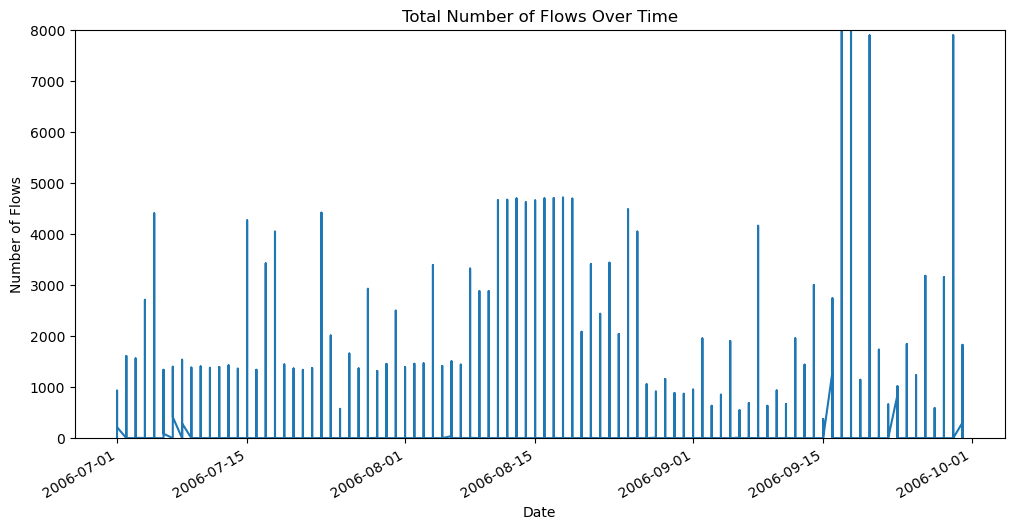

In [10]:
import matplotlib.pyplot as plt

df.set_index('date')['f'].plot(figsize=(12, 6))
plt.title('Total Number of Flows Over Time')
plt.ylabel('Number of Flows')
plt.xlabel('Date')
plt.ylim(0,8000)
plt.show()


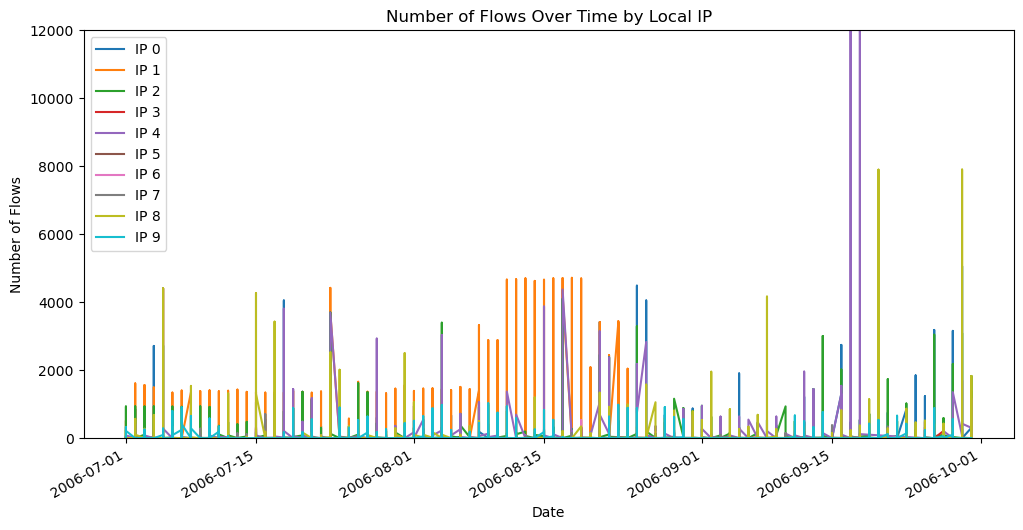

In [12]:
for ip in df['l_ipn'].unique():
    df[df['l_ipn'] == ip].set_index('date')['f'].plot(figsize=(12, 6), label=f'IP {ip}')
plt.legend()
plt.title('Number of Flows Over Time by Local IP')
plt.ylabel('Number of Flows')
plt.xlabel('Date')
plt.ylim(0,12000)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


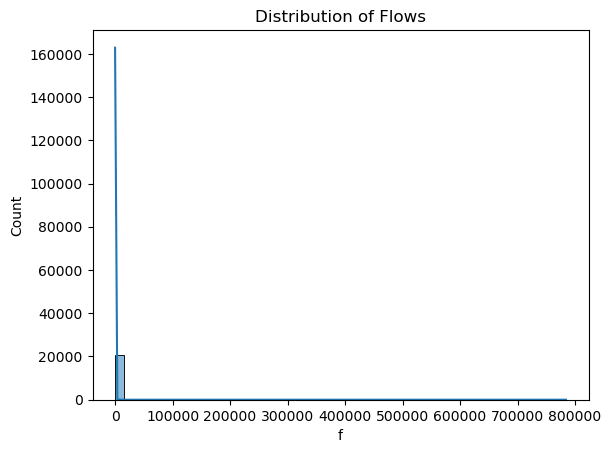

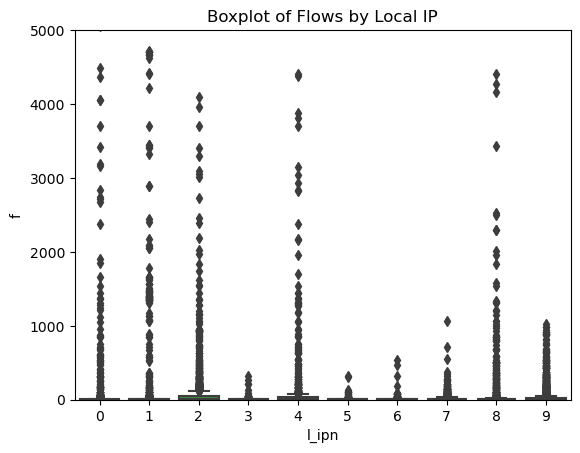

In [14]:
import seaborn as sns
import numpy as np

df.replace([np.inf, -np.inf], np.nan, inplace=True)

df.dropna(inplace=True)

sns.histplot(df['f'], bins=50, kde=True)
plt.title('Distribution of Flows')
# plt.ylim(0,10000)
plt.show()

sns.boxplot(x='l_ipn', y='f', data=df)
plt.title('Boxplot of Flows by Local IP')
plt.ylim(0,5000)
plt.show()

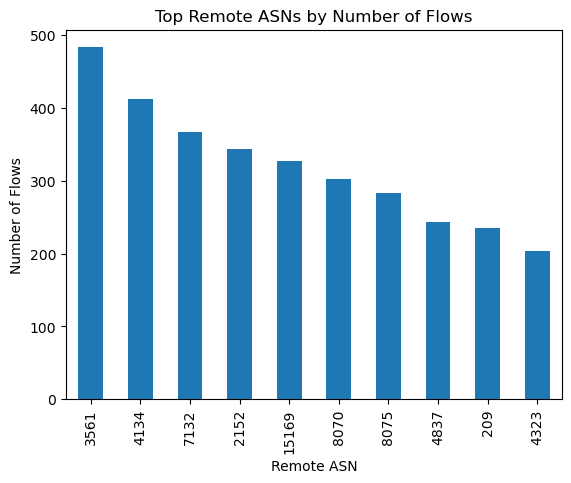

In [16]:
top_asns = df['r_asn'].value_counts().head(10)
top_asns.plot(kind='bar')
plt.title('Top Remote ASNs by Number of Flows')
plt.ylabel('Number of Flows')
plt.xlabel('Remote ASN')
plt.show()

In [18]:
from scipy import stats

z_scores = stats.zscore(df['f'])
df['outlier'] = (z_scores > 3) | (z_scores < -3)

anomalies = df[df['outlier']]
print(anomalies)

            date  l_ipn  r_asn       f  outlier
18237 2006-09-17      4   3671  274011     True
18392 2006-09-18      4   3671  784234     True


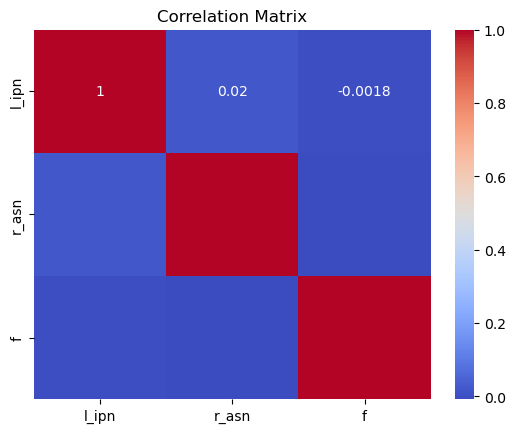

In [20]:
corr_matrix = df[['l_ipn', 'r_asn', 'f']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

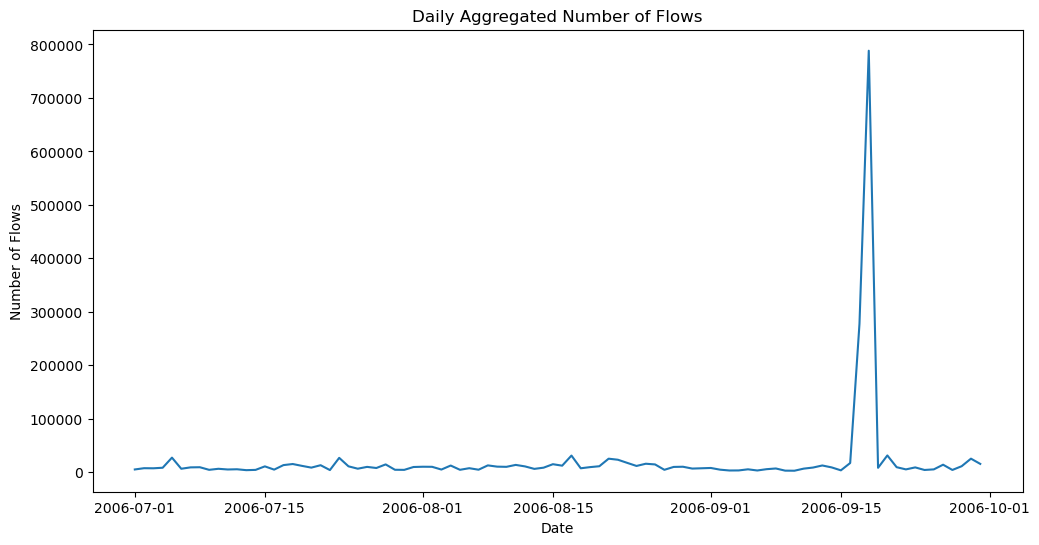

In [22]:
df['date'] = pd.to_datetime(df['date'])

# Group by the 'date' column and sum only the numeric columns
daily_df = df.groupby(df['date'].dt.date).sum(numeric_only=True)

# Plot the 'f' column which represents the sum of flows for each day
daily_df['f'].plot(figsize=(12, 6))
plt.title('Daily Aggregated Number of Flows')
plt.ylabel('Number of Flows')
plt.xlabel('Date')
plt.show()